In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn

In [4]:
import seaborn as sns

In [5]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [6]:
df = pd.DataFrame(iris_dataset['data'])

In [7]:
df['target'] = iris_dataset['target']

In [8]:
features = [feature for feature in iris_dataset['feature_names']]
features.append('target')

In [9]:
df.columns = features

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:4],df['target'],test_size=0.4,random_state=0)

In [13]:
df = pd.DataFrame(X_train,columns=df.columns)

In [14]:
del df['target']

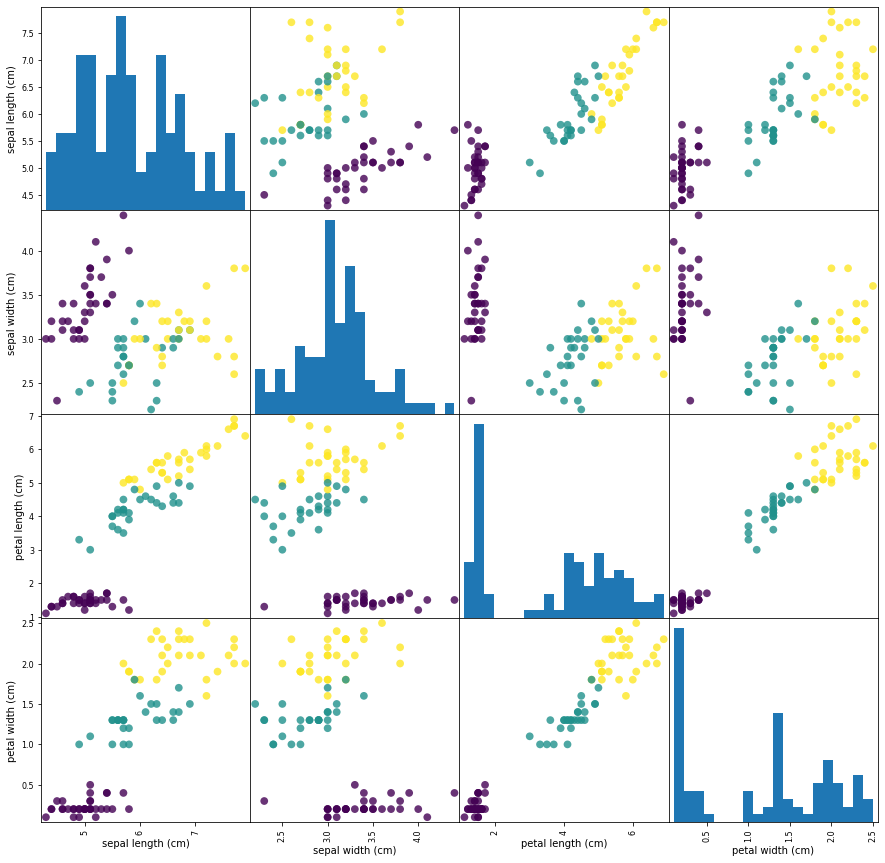

In [15]:
grr = pd.plotting.scatter_matrix(df, c=y_train, figsize=(15, 15), marker='O',
hist_kwds={'bins': 20}, s=60, alpha=.8)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=4)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [19]:
X_new = np.array([[5,2.9,1,.2]])
print(f'New shape: {X_new.shape}')

New shape: (1, 4)


In [20]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2])

In [21]:
y_test.to_numpy()

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2])

In [22]:
cf = sklearn.metrics.confusion_matrix(y_test,y_pred)

In [23]:
cf

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  5, 16]])

In [24]:
accuracy = (sum(cf[i][i] for i in range(cf.shape[0])))/sum(cf.ravel())

In [25]:
accuracy

0.9